Signal shape: (650000, 2)
Sampling frequency: 360
Channel names: ['MLII', 'V5']


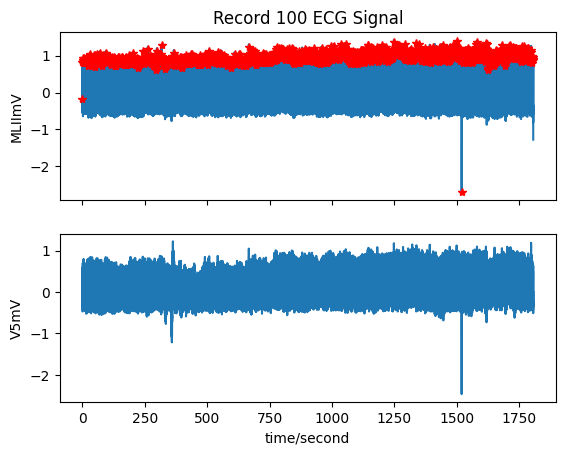

In [1]:
import wfdb
import os

# Set the path to your local MITDB folder
data_path = r'C:\Users\krake\Downloads\mizoram\mit-bih-arrhythmia-database-1.0.0'

# Choose a record name (without extension)
record_name = '100'

# Construct full path (without extension)
record_path = os.path.join(data_path, record_name)

# Read the signal
record = wfdb.rdrecord(record_path)
annotation = wfdb.rdann(record_path, 'atr')

# Display information
print("Signal shape:", record.p_signal.shape)
print("Sampling frequency:", record.fs)
print("Channel names:", record.sig_name)

# Optional: Plot signal with annotations
wfdb.plot_wfdb(record=record, annotation=annotation,
               title=f"Record {record_name} ECG Signal")


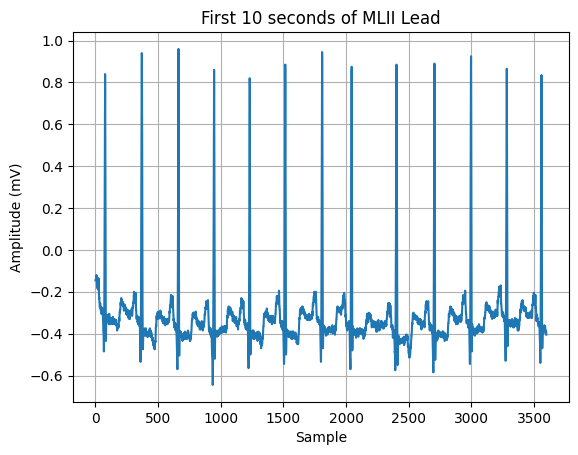

In [2]:
import matplotlib.pyplot as plt

# Plot the first 10 seconds of the first lead (MLII)
seconds = 10
samples = 360 * seconds
plt.plot(record.p_signal[:samples, 0])  # 0 for MLII
plt.title("First 10 seconds of MLII Lead")
plt.xlabel("Sample")
plt.ylabel("Amplitude (mV)")
plt.grid()
plt.show()


In [3]:
# Print first 10 annotations
for i in range(10):
    print(f"Sample: {annotation.sample[i]}, Label: {annotation.symbol[i]}")


Sample: 18, Label: +
Sample: 77, Label: N
Sample: 370, Label: N
Sample: 662, Label: N
Sample: 946, Label: N
Sample: 1231, Label: N
Sample: 1515, Label: N
Sample: 1809, Label: N
Sample: 2044, Label: A
Sample: 2402, Label: N


In [4]:
from collections import Counter

beat_counts = Counter(annotation.symbol)
print(beat_counts)


Counter({'N': 2239, 'A': 33, '+': 1, 'V': 1})


In [5]:
import os
import wfdb
from collections import Counter

# Path to your MIT-BIH folder
data_path = r'C:\Users\krake\Downloads\mizoram\mit-bih-arrhythmia-database-1.0.0'

# Get all record base names (e.g., 100, 101, 102...) by checking for .atr files
record_names = [f[:-4] for f in os.listdir(data_path) if f.endswith('.atr')]

# Counter to hold all symbols
total_counts = Counter()

for record_name in record_names:
    record_path = os.path.join(data_path, record_name)
    try:
        ann = wfdb.rdann(record_path, 'atr')
        total_counts.update(ann.symbol)
    except Exception as e:
        print(f"Error reading {record_name}: {e}")

# Print summary
print("Annotation Counts Across All Records:\n")
for symbol, count in total_counts.most_common():
    print(f"{symbol}: {count}")


Annotation Counts Across All Records:

N: 75151
/: 9056
L: 8075
R: 7259
V: 7134
A: 2546
+: 1296
f: 1038
F: 803
~: 616
!: 472
": 437
j: 229
x: 193
a: 150
|: 132
E: 106
J: 83
Q: 33
e: 16
[: 6
]: 6
S: 2


| Symbol   | Meaning                                            | Class Type                 |       |
| -------- | -------------------------------------------------- | -------------------------- | ----- |
| **N**    | Normal beat                                        | Normal                     |       |
| **L**    | Left bundle branch block beat                      | Arrhythmia                 |       |
| **R**    | Right bundle branch block beat                     | Arrhythmia                 |       |
| **V**    | Premature ventricular contraction (PVC)            | Arrhythmia                 |       |
| **A**    | Atrial premature beat                              | Arrhythmia                 |       |
| **/ /**  | Paced beat                                         | Pacing                     |       |
| **f**    | Fusion of paced and normal beat                    | Rare/Arrhythmia            |       |
| **F**    | Fusion of ventricular and normal beat              | Rare/Arrhythmia            |       |
| **!**    | Ventricular flutter wave                           | Rare arrhythmia            |       |
| **\~**   | Signal quality change                              | Noise/Artifact             |       |
| **+**    | New segment (typically every 10 minutes)           | Not a beat                 |       |
| **"**    | Rhythm change annotation                           | Not a beat                 |       |
| **j**    | Nodal (junctional) escape beat                     | Rare arrhythmia            |       |
| **x**    | Non-conducted P-wave (blocked beat)                | Rare arrhythmia            |       |
| **a**    | Aberrated atrial premature beat                    | Rare arrhythmia            |       |
| \*\*     | \*\*                                               | Isolated QRS-like artifact | Noise |
| **E**    | Ventricular escape beat                            | Rare arrhythmia            |       |
| **J**    | Nodal (junctional) premature beat                  | Rare arrhythmia            |       |
| **Q**    | Unclassifiable beat                                | Noise or unknown           |       |
| **e**    | Atrial escape beat                                 | Rare arrhythmia            |       |
| **\[ ]** | Start/end of supra-ventricular tachycardia episode | Rhythm marker              |       |
| **S**    | Asystole                                           | Very rare/emergency        |       |


| Label | Symbol(s)     | Description                        |
| ----- | ------------- | ---------------------------------- |
| 0     | `N`           | Normal beat                        |
| 1     | `L`, `R`      | Bundle branch block beats          |
| 2     | `A`, `a`, `J` | Atrial/nodal premature beats       |
| 3     | `V`, `F`      | Premature ventricular contractions |
| 4     | Others/Noise  | `e`, `E`, `/`, `f`, `!`, `~`, etc. |


In [6]:
import os
import wfdb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter, defaultdict

# Set up your data path
data_path = r'C:\Users\krake\Downloads\mizoram\mit-bih-arrhythmia-database-1.0.0'

# Get record names (based on .atr files)
record_names = [f[:-4] for f in os.listdir(data_path) if f.endswith('.atr')]

# Track beat counts, signal lengths, channel info
all_annotations = []
signal_lengths = []
record_info = []

symbol_counter = Counter()
record_beat_distribution = defaultdict(Counter)

for record_name in record_names:
    record_path = os.path.join(data_path, record_name)
    try:
        # Read signal and annotations
        record = wfdb.rdrecord(record_path)
        annotation = wfdb.rdann(record_path, 'atr')

        # Update counters
        symbol_counter.update(annotation.symbol)
        signal_lengths.append((record_name, len(record.p_signal)))
        record_beat_distribution[record_name].update(annotation.symbol)

        # Save detailed annotations
        for sample, symbol in zip(annotation.sample, annotation.symbol):
            if symbol in ['N', 'L', 'R', 'A', 'V', 'F', 'e', 'j', 'a', 'E', 'J']:
                all_annotations.append({
                    'record': record_name,
                    'sample': sample,
                    'symbol': symbol,
                    'fs': record.fs,
                    'channel_names': record.sig_name
                })

        # Save record info
        record_info.append({
            'record': record_name,
            'length': len(record.p_signal),
            'channels': record.sig_name,
            'sampling_rate': record.fs
        })

    except Exception as e:
        print(f"Error reading {record_name}: {e}")



Error reading 102-0: [Errno 2] No such file or directory: 'C:/Users/krake/Downloads/mizoram/mit-bih-arrhythmia-database-1.0.0/102-0.hea'


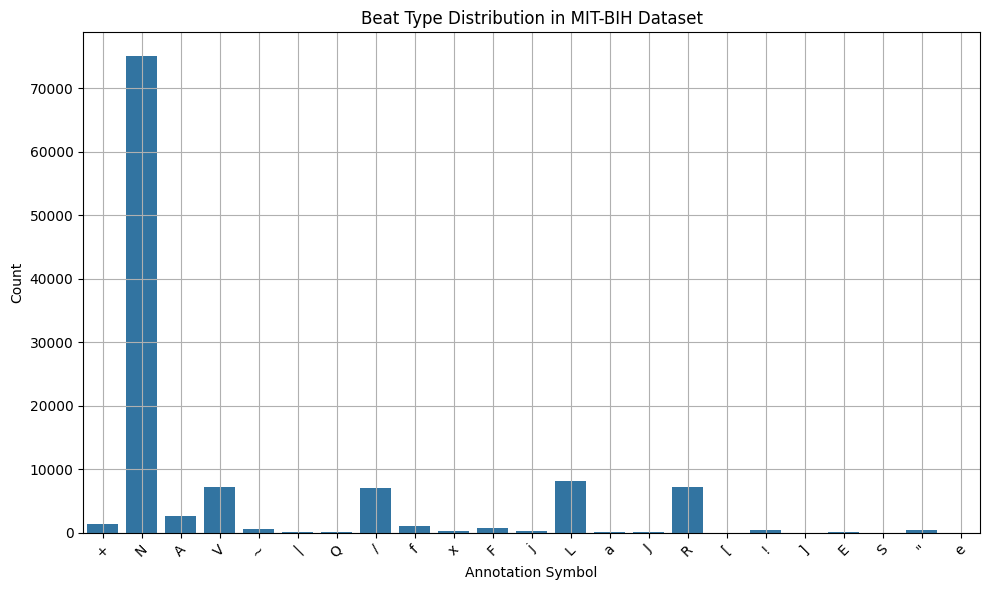

In [7]:
# Plot distribution of beat types
plt.figure(figsize=(10, 6))
sns.barplot(x=list(symbol_counter.keys()), y=list(symbol_counter.values()))
plt.title("Beat Type Distribution in MIT-BIH Dataset")
plt.xlabel("Annotation Symbol")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


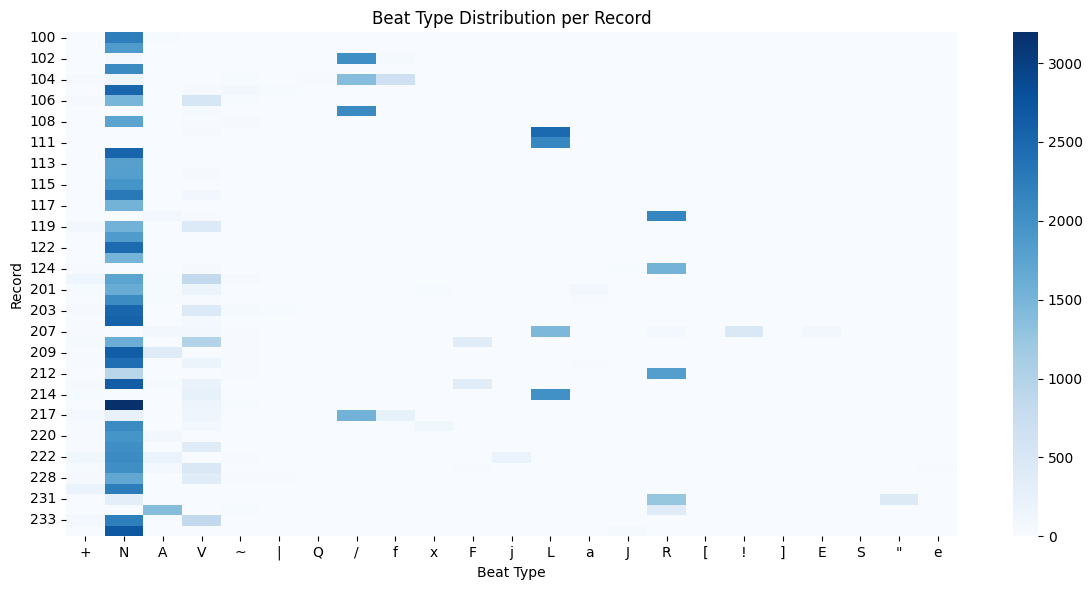

In [8]:
# Convert to DataFrame
beat_dist_df = pd.DataFrame(record_beat_distribution).fillna(0).T

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(beat_dist_df, cmap='Blues', annot=False, cbar=True)
plt.title("Beat Type Distribution per Record")
plt.xlabel("Beat Type")
plt.ylabel("Record")
plt.tight_layout()
plt.show()


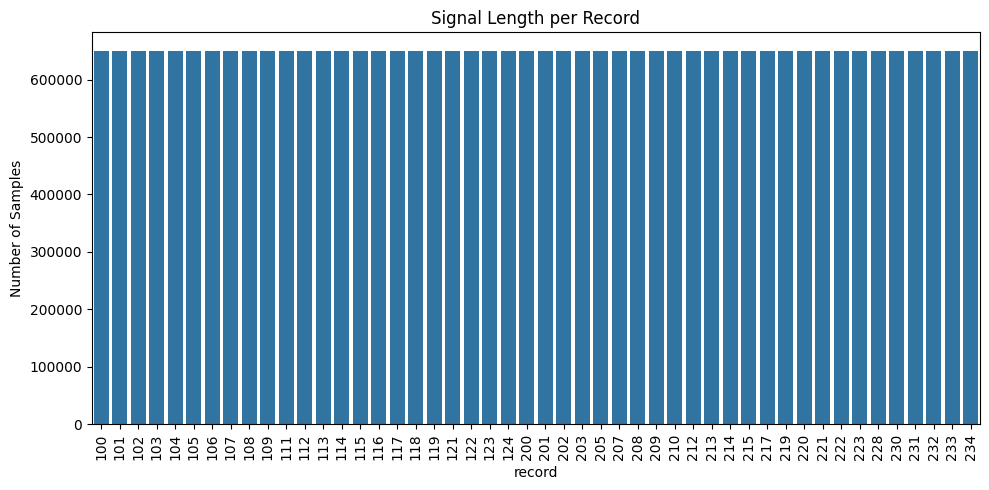

In [9]:
signal_df = pd.DataFrame(signal_lengths, columns=['record', 'length'])

plt.figure(figsize=(10, 5))
sns.barplot(data=signal_df, x='record', y='length')
plt.xticks(rotation=90)
plt.title("Signal Length per Record")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()


In [1]:
import os
from collections import Counter

data_path = r'C:\Users\krake\Downloads\mizoram\mit-bih-arrhythmia-database-1.0.0'

file_extensions = [os.path.splitext(f)[1] for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f))]

extension_counts = Counter(file_extensions)

print("File formats in the directory:")
for ext, count in extension_counts.items():
    print(f"{ext}: {count} files")


File formats in the directory:
.atr: 49 files
.dat: 48 files
.hea: 48 files
.xws: 48 files
.at_: 8 files
.at-: 1 files
: 2 files
.txt: 1 files
